In [1]:
import pandas as pd
df = pd.read_csv(r"C:\Users\prakhar\Desktop\capstone\Data.csv")

In [2]:
df

Temp     Ph  Turbidity        TDS
0     1.0  6.927     1.6390  1080.2998
1     1.5  6.940     1.6589  1076.3497
2     2.0  6.953     1.6788  1072.3996
3     2.5  6.966     1.6987  1068.4495
4     3.0  6.979     1.7186  1064.4994
..    ...    ...        ...        ...
134  68.0  8.669     4.3056   550.9864
135  68.5  8.682     4.3255   547.0363
136  69.0  8.695     4.3454   543.0862
137  69.5  8.708     4.3653   539.1361
138  70.0  8.721     4.3852   535.1860

[139 rows x 4 columns]

In [3]:
result=[1] * 139

In [4]:
for i in range(0,139):
    if df['Ph'][i] > 9 or df['Ph'][i] < 4:
        result[i]=0
    elif df['Turbidity'][i] > 4 or df['Turbidity'][i] < 1.7:
        result[i]=0
    elif df['TDS'][i] > 1050 or df['TDS'][i] < 50:
        result[i]=0    

In [5]:
df['result']=result

# Water Quality Dataset

### The result 0 denotes impure/inappropriate water and result 1 deonotes pure/appropriate water 

In [6]:
df

Temp     Ph  Turbidity        TDS  result
0     1.0  6.927     1.6390  1080.2998       0
1     1.5  6.940     1.6589  1076.3497       0
2     2.0  6.953     1.6788  1072.3996       0
3     2.5  6.966     1.6987  1068.4495       0
4     3.0  6.979     1.7186  1064.4994       0
..    ...    ...        ...        ...     ...
134  68.0  8.669     4.3056   550.9864       0
135  68.5  8.682     4.3255   547.0363       0
136  69.0  8.695     4.3454   543.0862       0
137  69.5  8.708     4.3653   539.1361       0
138  70.0  8.721     4.3852   535.1860       0

[139 rows x 5 columns]

## There are four main features of our dataset- Temp, Ph, Turbidity and TDS  

In [7]:
df.feature_names=['Temp','Ph','Turbidity','TDS']

<ipython-input-7-7d8133593abd>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.feature_names=['Temp','Ph','Turbidity','TDS']


## Two models are used for training- Decision Tree and Random Forest 

In [8]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn import metrics
import pandas as pd
import numpy as np
from sklearn import tree

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(df[df.feature_names], df['result'], random_state=0)

### Decision Tree 

In [10]:
clf = DecisionTreeClassifier(criterion="entropy",splitter="best")
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)

### Visualising Decision Tree 

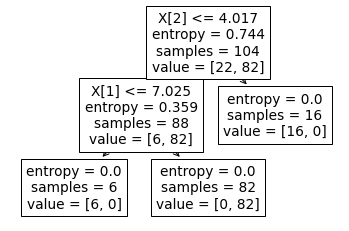

In [11]:
tree.plot_tree(clf);

In [12]:
!pip install pydotplus

You should consider upgrading via the 'd:\anaconda\python.exe -m pip install --upgrade pip' command.


In [13]:
!pip install graphviz

You should consider upgrading via the 'd:\anaconda\python.exe -m pip install --upgrade pip' command.


In [14]:
conda install graphviz

Solving environment: ...working... done

## Package Plan ##

  environment location: D:\Anaconda


Note: you may need to restart the kernel to use updated packages.  added / updated specs:
    - graphviz



The following packages will be SUPERSEDED by a higher-priority channel:

  conda              conda-forge::conda-4.11.0-py38haa244f~ --> pkgs/main::conda-4.11.0-py38haa95532_0


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done


In [15]:
conda install -c conda-forge pydotplus

Solving environment: ...working... done

## Package Plan ##

  environment location: D:\Anaconda

  added / updated specs:
    - pydotplus


The following packages will be SUPERSEDED by a higher-priority channel:

  conda              pkgs/main::conda-4.11.0-py38haa95532_0 --> conda-forge::conda-4.11.0-py38haa244fe_0


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done

Note: you may need to restart the kernel to use updated packages.


Accuracy: 97.14285714285714


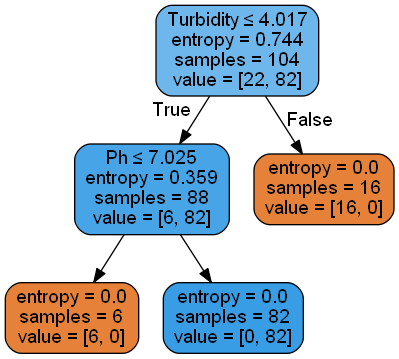

In [16]:
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
fn=['Temp','Ph','Turbidity','TDS']
cn=['Impure', 'Pure']
print("Accuracy:",(metrics.accuracy_score(Y_test, y_pred)*100))
# Visualize the graph
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, feature_names=fn,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### Random Forest 

In [17]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion="entropy",n_estimators=100, 
                            max_depth=3,
                            max_features='auto', 
                            min_samples_leaf=4,
                            bootstrap=True, 
                            n_jobs=-1, 
                            random_state=0)
rf.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', max_depth=3, min_samples_leaf=4,
                       n_jobs=-1, random_state=0)

### Visualising Random Forest 

In [18]:
fig,axes = plt.subplots(nrows=1,ncols=4,figsize=(10,3),dpi=3000)
for i in range(0,4):
    tree.plot_tree(rf.estimators_[i], 
          feature_names=fn,
          class_names=cn, 
          filled=True,ax=axes[i])
    axes[i].set_title("Estimator: "+str(i),fontsize=12)

## Combining 2 models using Voting Classifier 

In [19]:
from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators=[('clf', clf), ('rf', rf)],voting='soft')

In [20]:
voting.fit(X_train,Y_train)
y_pred = voting.predict(X_test)
print("Precision",precision_score(Y_test,y_pred, average='micro'))
print("Accuracy",(accuracy_score(Y_test,y_pred)*100))

Precision 0.9714285714285714
Accuracy 97.14285714285714


In [21]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(voting, 'saved_model.pkl')

You should consider upgrading via the 'd:\anaconda\python.exe -m pip install --upgrade pip' command.


['saved_model.pkl']

In [22]:
df.to_csv(r"C:\Users\prakhar\Desktop\WaterQ\dataset",index = False)